<div id="container" style="position:relative;">
<div style="float:left"><h1> Stats and Public Health Part 2 </h1></div>
<div style="position:relative; float:right">

### Sri Casper

### Introduction

We will explore the West Nile Virus dataset to explore the population of mosquitoes in Chicago. The original dataset was sourced from the City of Chicago. The dataset used in this notebook is an adapted version.

### Dataset

Mosquito_data_part_2 dataset will be used in this report. The dataset contains information about West Nile Virus (WNV) which is a viral illness largely spread by mosquitos. The disease is transmitted to a person when an infected mosquito bites them. Moreover, the dataset also shows tracking data of mosquito populations and WNV prevalence using a series of traps that were placed around the city by The City of Chicago, Illinois from 2008 to 2019.

#### Data Dictionary

- <b>Year</b>: Year that the WNV test is performed (int64)
- <b>Week</b>: Week that the WNV test is performed (int64)
- <b>Address Block</b>: Address of the location of trap (object)
- <b>Trap</b>: Id of the trap (object)
- <b>Trap type</b>: Type of trap (object)
- <b>Date</b>: Date and time that the WNV test is performed (object)
- <b>Mosquito number</b>: Number of mosquitoes caught in this trap (int64)
- <b>WNV Present</b>: Whether West Nile Virus was present in these mosquitos (object)
- <b>Species</b>: Mosquito species (object)
- <b>Lat</b>: Latitude of trap (float64)
- <b>Lon</b>: Longitude of trap (float64)
- <b>Month</b>: Month that the WNV test is performed (int64)

#### Field of Interest

Explore the population of the mosquitoes in Chicago and the relationships between each variable within the dataset, such as mosquito number, species, and WNV prevalence.

#### Table of Contents

- Part 1 - Basic Analysis
- Part 2 - Statistical Analysis
- Part 3 - Advance Statistical Analysis

In [173]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [5]:
# Import data to a new dataframe

mdf = pd.read_csv('mosquito_data_part_2.csv')

### Basic Analysis

In [6]:
# Shape of the dataframe

mdf.shape

(18495, 12)

- There are 18,495 rows and 12 columns in our dataset.

In [8]:
# Print out rows and columns of the datasets

print(f'There are {mdf.shape[0]} rows and {mdf.shape[1]} columns in the dataset.')

There are 18495 rows and 12 columns in the dataset.


Next, viewing the structure of the data by checking the first rows.

In [14]:
# Checking the top rows

mdf.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


- There is no evidence of any missing values in the dataset, at least in the top rows.

#### See the info and data type of each column

In [10]:
# Getting high level overview of data set

mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


- At this point, we can assume that there is no missing value since there are 18,495 values (total rows) in all columns.
- Also, there are columns recorded in integers, floats, and objects.
- Next, we will take a look each datatype of the columns.

In [11]:
# Filtering out only the columns with int datatype

mdf.select_dtypes('int64').head()

,Year,Week,Mosquito number,Month
0,2019,39,2,9
1,2019,39,1,9
2,2019,39,2,9
3,2019,39,1,9
4,2019,39,9,9


In [12]:
# Filtering out only the columns with float datatype

mdf.select_dtypes('float64').head()

,Lat,Lon
0,41.977738,-87.880969
1,41.798211,-87.736925
2,41.987245,-87.689417
3,41.953664,-87.724987
4,41.657069,-87.546049


In [13]:
# Filtering out only the columns with object datatype

mdf.select_dtypes('object').head()

,Address Block,Trap,Trap type,Date,WNV Present,Species
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS


In [11]:
# Checking random five rows to see if anamolous data is visible

df.select_dtypes('object').sample(5)

,Address Block,Trap,Trap type,Date,Mosquito ID,WNV Present,Species
10882,35XX W 51ST ST,T062,GRAVID,2010-08-13 00:08:00,Res,negative,CULEX RESTUANS
5384,89XX S MUSKEGON AVE,T099,GRAVID,2014-09-18 00:09:00,Res,negative,CULEX RESTUANS
14469,4XX E 130TH ST,T221,GRAVID,2007-08-17 00:08:00,Pip,negative,CULEX PIPIENS
10402,39XX N SPRINGFIELD AVE,T228,GRAVID,2010-09-16 00:09:00,Ter,negative,CULEX TERRITANS
752,37XX S PULASKI RD,T063,GRAVID,2019-07-03 00:07:00,Res,negative,CULEX RESTUANS


- The only column which appears to have an incorrect data type is Date, so this will be resolved in the next step.

#### Convert the <b>Date</b> column to 'datetime' format

In [15]:
# Converting the Date column datatype

mdf['Date'] = mdf['Date'].astype('datetime64')

Check if this has been updated correctly

In [17]:
# Crosschecking to ensure it is updated

mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Trap             18495 non-null  object        
 4   Trap type        18495 non-null  object        
 5   Date             18495 non-null  datetime64[ns]
 6   Mosquito number  18495 non-null  int64         
 7   WNV Present      18495 non-null  object        
 8   Species          18495 non-null  object        
 9   Lat              18495 non-null  float64       
 10  Lon              18495 non-null  float64       
 11  Month            18495 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.7+ MB


In [22]:
# Getting summary statistics for the dataset

mdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,18495.0,2012.905812,3.725857,2007.000000,2010.000000,2013.000000,2016.000000,2019.000000
Week,18495.0,31.004001,4.332020,20.000000,28.000000,31.000000,34.000000,40.000000
Mosquito number,18495.0,10.879913,13.475066,1.000000,2.000000,5.000000,14.000000,50.000000
Lat,18495.0,41.852599,0.115419,41.644720,41.754148,41.872873,41.970102,42.017801
Lon,18495.0,-87.712611,0.095409,-87.880969,-87.778235,-87.703105,-87.643076,-87.531051
Month,18495.0,7.627088,0.998079,5.000000,7.000000,8.000000,8.000000,10.000000


#### Although the provided dataset is cleaned, it is best to double check before performing an analysis.

In [18]:
# Checking for null values 

mdf.isna().any()

Year               False
Week               False
Address Block      False
Trap               False
Trap type          False
Date               False
Mosquito number    False
WNV Present        False
Species            False
Lat                False
Lon                False
Month              False
dtype: bool

In [23]:
# Sanity check

mdf.isna().sum()

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
Month              0
dtype: int64

- There are no null values.

In [19]:
# Checking for duplicate columns 

mdf.T.duplicated().any()

False

In [20]:
# Checking for duplicate rows 

mdf[df.duplicated()]

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
15495,2018,34,100XX W OHARE AIRPORT,T912,GRAVID,2018-08-23 00:08:00,3,positive,CULEX PIPIENS,41.977738,-87.880969,8
15504,2011,32,100XX W OHARE AIRPORT,T916,GRAVID,2011-08-12 00:08:00,11,positive,CULEX PIPIENS,41.977738,-87.880969,8
15520,2010,33,100XX W OHARE,T903,GRAVID,2010-08-20 00:08:00,27,positive,CULEX RESTUANS,41.977738,-87.880969,8
15523,2016,34,100XX W OHARE AIRPORT,T911,GRAVID,2016-08-25 00:08:00,8,positive,CULEX RESTUANS,41.977738,-87.880969,8
15528,2017,34,100XX W OHARE AIRPORT,T900,GRAVID,2017-08-24 00:08:00,2,positive,CULEX RESTUANS,41.977738,-87.880969,8
...,...,...,...,...,...,...,...,...,...,...,...,...
18476,2013,29,100XX W OHARE AIRPORT,T912,GRAVID,2013-07-19 00:07:00,46,positive,CULEX RESTUANS,41.977738,-87.880969,7
18477,2013,35,100XX W OHARE AIRPORT,T906,GRAVID,2013-08-29 00:08:00,50,positive,CULEX PIPIENS,41.977738,-87.880969,8
18486,2016,29,100XX W OHARE AIRPORT,T911,GRAVID,2016-07-21 00:07:00,47,positive,CULEX RESTUANS,41.977738,-87.880969,7
18488,2017,30,100XX W OHARE AIRPORT,T900,GRAVID,2017-07-27 00:07:00,17,positive,CULEX RESTUANS,41.977738,-87.880969,7


- There are duplicated rows in the dataset.
- Before dropping duplicated rows, we must consider whether this is a data entry error or it actually makes sense to contain the duplicate rows in this dataset. 
- However, these duplicated rows will not be dropped at this point because it is possible that there were WNV test performed at the same time, in the same location, with the same trap type, and getting the same result.

#### Convert the WNV Present column into a binary column

#### WNV Present

In [25]:
# View the column

mdf['WNV Present']

0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
18490    positive
18491    positive
18492    positive
18493    positive
18494    positive
Name: WNV Present, Length: 18495, dtype: object

In [26]:
# Check all distinct values

mdf['WNV Present'].value_counts()

negative    14501
positive     3994
Name: WNV Present, dtype: int64

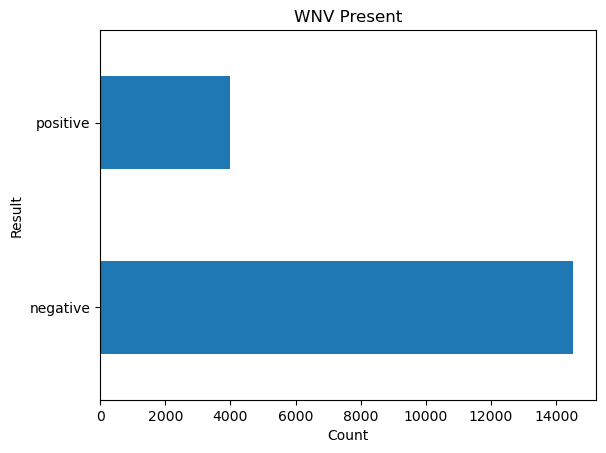

In [28]:
# View all distinct values on a bar chart

mdf['WNV Present'].value_counts().plot(kind='barh')

plt.title('WNV Present')
plt.xlabel('Count')
plt.ylabel('Result')

plt.show()

In [29]:
# Calculate the proportion of all distinct values

mdf['WNV Present'].value_counts()/mdf.shape[0]

negative    0.78405
positive    0.21595
Name: WNV Present, dtype: float64

- According to the result above, the data is not balanced. - the majority of the result in the dataset was *not* present (negative) as opposed to those that did, which is approximately 78/22 percent.
- This column will be converted to a binary column, where <b>1 represents positive</b> for the present of WNV, and <b>0 represents negative</b> or non-present of WNV.

In [30]:
# Use the np.where to convert

mdf['WNV Present'] = np.where(mdf['WNV Present'] == 'positive', 1, 0)

In [31]:
# Check if the column is converted

mdf['WNV Present'].value_counts()

0    14501
1     3994
Name: WNV Present, dtype: int64

- <b>'WNV Present'</b> column is now converted into a <b>binary</b> column.

#### Create dummy variables from the Trap type column

In [33]:
# View the column

mdf['Trap type']

0          GRAVID
1          GRAVID
2          GRAVID
3          GRAVID
4          GRAVID
           ...   
18490      GRAVID
18491      GRAVID
18492      GRAVID
18493    SENTINEL
18494      GRAVID
Name: Trap type, Length: 18495, dtype: object

In [34]:
# Check all distinct values

mdf['Trap type'].value_counts()

GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

In [35]:
# Use 0 and 1 to represent the presence of each trap type

pd.get_dummies(mdf['Trap type'])

,CDC,GRAVID,OVI,SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0
18493,0,0,0,1


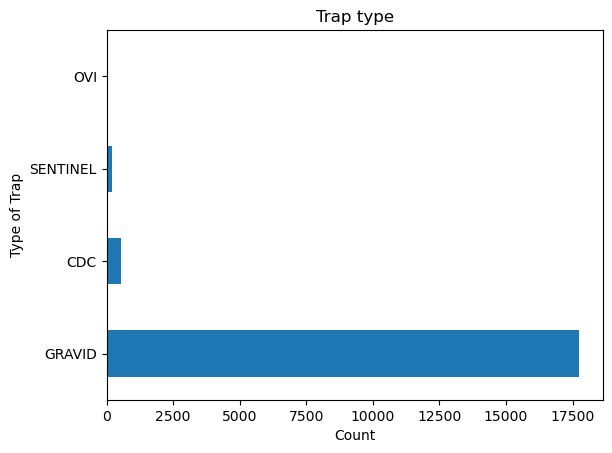

In [37]:
# View all distinct values on a bar chart

mdf['Trap type'].value_counts().plot(kind='barh')

plt.title('Trap type')
plt.xlabel('Count')
plt.ylabel('Type of Trap')

plt.show()

In [38]:
# Calculate the proportion of all distinct values

mdf['Trap type'].value_counts()/mdf.shape[0]

GRAVID      0.959232
CDC         0.029413
SENTINEL    0.011300
OVI         0.000054
Name: Trap type, dtype: float64

- According to the result above, it shows that far more amount of the trap type being used is <b>GRAVID</b>, approximately 96%. There is only approximately 4% of other trap types being used in this experiment. 

#### Number of mosquitoes for each month

In [41]:
# Check all distinct values

mdf['Month'].value_counts()

8     6872
7     5108
9     3461
6     2787
10     225
5       42
Name: Month, dtype: int64

In [48]:
mdf['Mosquito number'].

0         2
1         1
2         2
3         1
4         9
         ..
18490     4
18491    19
18492    34
18493    50
18494     6
Name: Mosquito number, Length: 18495, dtype: int64

In [86]:
mdf.groupby(mdf['Month'])['Mosquito number'].mean()

Month
5      2.761905
6     10.264442
7     11.551879
8     12.111321
9      8.394973
10     5.377778
Name: Mosquito number, dtype: float64

In [87]:
mdf.groupby(mdf['Month'])['Mosquito number'].mean()*100

Month
5      276.190476
6     1026.444205
7     1155.187940
8     1211.132130
9      839.497255
10     537.777778
Name: Mosquito number, dtype: float64

- Notice that the averege number of mosquitoes is increasing from Month 5 to Month 8 while being at the highest in Month 8 or <b>August</b>. After that, the average number of mosquitoes is decreasing from Month 9 to Month 10.

In [93]:
# View columns and data type

mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Trap             18495 non-null  object        
 4   Trap type        18495 non-null  object        
 5   Date             18495 non-null  datetime64[ns]
 6   Mosquito number  18495 non-null  int64         
 7   WNV Present      18495 non-null  int64         
 8   Species          18495 non-null  object        
 9   Lat              18495 non-null  float64       
 10  Lon              18495 non-null  float64       
 11  Month            18495 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.7+ MB


- Even though the data are clean, we are dealing with a large number of categorical variables (stored as object type in pandas). We will need to convert these to numerical representations such that we can apply statistical modeling.

#### Address Block

In [94]:
mdf['Address Block']

0         100XX W OHARE AIRPORT
1             52XX S KOLMAR AVE
2            58XX N WESTERN AVE
3        39XX N SPRINGFIELD AVE
4           131XX S BRANDON AVE
                  ...          
18490             3XX W 18TH ST
18491      46XX N MILWAUKEE AVE
18492          127XX S DOTY AVE
18493        20XX N DOMINICK ST
18494     100XX W OHARE AIRPORT
Name: Address Block, Length: 18495, dtype: object

In [97]:
# Check all distinct values

mdf['Address Block'].value_counts()

100XX W OHARE AIRPORT       2039
41XX N OAK PARK AVE          408
101XX S STONY ISLAND AVE     369
52XX S KOLMAR AVE            349
1XX N CENTRAL PARK DR        335
                            ... 
29XX N KENNETH AVE             2
54XX W PARKER AVE              1
4XX W 127TH ST                 1
104XX S OGLESBY AVE            1
21XX S HAMLIN AVE              1
Name: Address Block, Length: 154, dtype: int64

Convert 'Address Block' into a binary variable

- In this case, '100XX W OHARE AIRPORT' is chosen as the area of interest because it contains the most value. 

In [218]:
# Convert the column into a binary variable

mdf['ohare_airport'] = np.where(df['Address Block'] == '100XX W OHARE AIRPORT', 1, 0)

In [219]:
# Count the value of the variable

mdf['ohare_airport'].value_counts()

0    16456
1     2039
Name: ohare_airport, dtype: int64

In [220]:
# Check if the new column is updated

mdf.columns

Index(['Year', 'Week', 'Address Block', 'Trap', 'Trap type', 'Date',
       'Mosquito number', 'WNV Present', 'Species', 'Lat', 'Lon', 'Month',
       'ohare_airport'],
      dtype='object')

In [ ]:
# Drop Address Block column from the original dataframe

mdf.drop('Address Block)', axis=1, inplace=True)

#### Trap

In [221]:
mdf['Trap']

0         T910
1         T114
2         T028
3         T228
4         T209
         ...  
18490     T043
18491     T003
18492     T115
18493    T240B
18494     T902
Name: Trap, Length: 18495, dtype: object

In [222]:
# Check all distinct values

mdf['Trap'].value_counts()

T002     406
T114     340
T031     333
T008     326
T138     304
        ... 
T128A      1
T135B      1
T241       1
T167       1
T040       1
Name: Trap, Length: 190, dtype: int64

Convert 'Trap' into a binary variable
- There are two main categories in this columns; satellite and non-satellite traps. Thus, they will be categorized based on their ID where the ones end with a letter represent 'satellite_trap'.

In [223]:
# Convert the column into a binary variable

mdf['satellite_trap'] = np.where(df['Trap'].str.match("^.*[a-zA-z]$"), 1, 0)

In [224]:
# Count the value of the variable

mdf['satellite_trap'].value_counts()

0    17905
1      590
Name: satellite_trap, dtype: int64

#### Species

In [226]:
mdf['Species']

0        CULEX RESTUANS
1        CULEX RESTUANS
2        CULEX RESTUANS
3        CULEX RESTUANS
4        CULEX RESTUANS
              ...      
18490     CULEX PIPIENS
18491     CULEX PIPIENS
18492    CULEX RESTUANS
18493    CULEX RESTUANS
18494    CULEX RESTUANS
Name: Species, Length: 18495, dtype: object

In [227]:
# Check all distinct values

mdf['Species'].value_counts()

CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: Species, dtype: int64

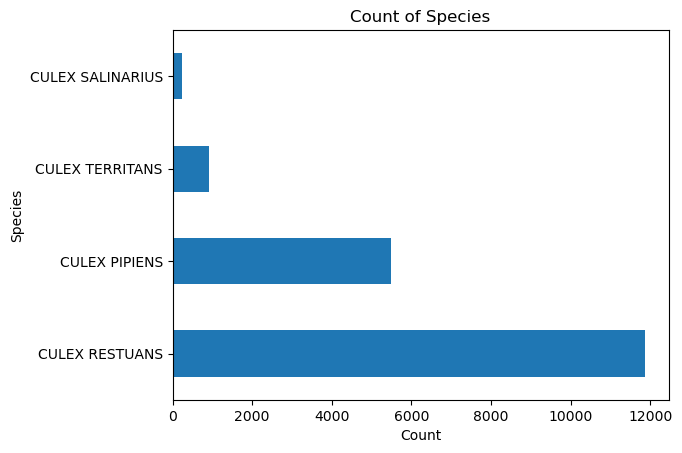

In [228]:
# Create a bar plot

mdf['Species'].value_counts().plot(kind='barh')
plt.title('Count of Species')
plt.xlabel('Count')
plt.ylabel('Species')
plt.show()

In [231]:
# Calculate the proportion

mdf['Species'].value_counts()/mdf.shape[0]

CULEX RESTUANS      0.641579
CULEX PIPIENS       0.296621
CULEX TERRITANS     0.049581
CULEX SALINARIUS    0.012220
Name: Species, dtype: float64

- According to the result abouve, the highest species is <b>CULEX RESTUANS</b> at 64%.

Dummy encoding is chosen instead of One-hot encoding because there is no 'unknown' in this dataset. Moreover, this dataset is claimed to be cleaned.

In [229]:
# Create dummy variables for 'Species'

pd.get_dummies(mdf['Species'])

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,1,0,0,0
18491,1,0,0,0
18492,0,1,0,0
18493,0,1,0,0


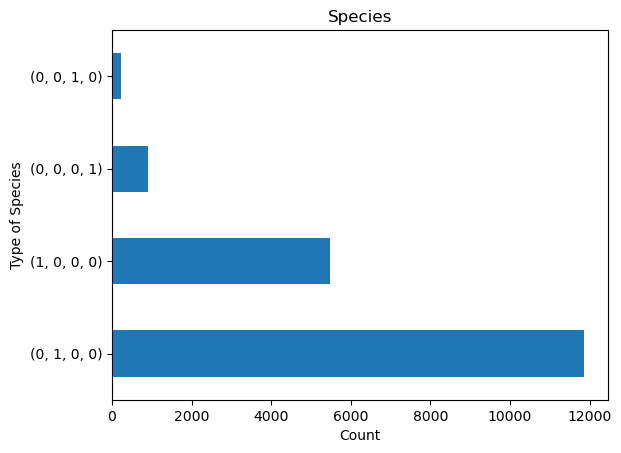

In [299]:
# View all distinct values on a bar chart

dummy_species = pd.get_dummies(mdf['Species'])

dummy_species.value_counts().plot(kind='barh')

plt.title('Species')
plt.xlabel('Count')
plt.ylabel('Type of Species')

plt.show()

In [302]:
# Check all the columns

mdf.columns

Index(['Year', 'Week', 'Address Block', 'Trap', 'Trap type', 'Date',
       'Mosquito number', 'WNV Present', 'Species', 'Lat', 'Lon', 'Month',
       'ohare_airport', 'satellite_trap'],
      dtype='object')

### Statistical Analysis

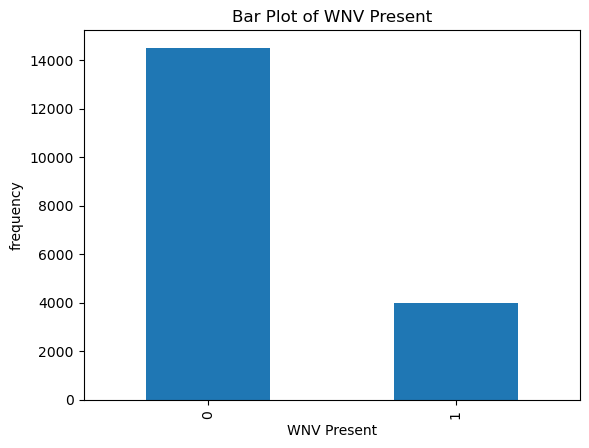

In [142]:
# Create a bar plot for 'WNV Present'

mdf['WNV Present'].value_counts().plot(kind = 'bar')
plt.title('Bar Plot of WNV Present')
plt.xlabel('WNV Present')
plt.ylabel('frequency');

- The majority of values are not present.

#### See if there is a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus

In [143]:
# Group the mosquito ID by WNV present

mdf.groupby(['Species','WNV Present'])['WNV Present'].count()

Species           WNV Present
CULEX PIPIENS     0              4074
                  1              1412
CULEX RESTUANS    0              9309
                  1              2557
CULEX SALINARIUS  0               215
                  1                11
CULEX TERRITANS   0               903
                  1                14
Name: WNV Present, dtype: int64

In [144]:
# Proportion of whether WNV present or not based on the mosquito ID (species)

mdf.groupby(['Species','WNV Present'])['WNV Present'].count() / mdf.groupby('Species')['WNV Present'].count()

Species           WNV Present
CULEX PIPIENS     0              0.742618
                  1              0.257382
CULEX RESTUANS    0              0.784510
                  1              0.215490
CULEX SALINARIUS  0              0.951327
                  1              0.048673
CULEX TERRITANS   0              0.984733
                  1              0.015267
Name: WNV Present, dtype: float64

In [146]:
# Group WNV present by mosquito ID (species)

mosquito_present_data = (mdf.groupby(['Species','WNV Present'])['WNV Present'].count() / mdf.groupby('Species')['WNV Present'].count())*100

mosquito_present_data.unstack()[[1,0]]

WNV Present,1,0
Species,,
CULEX PIPIENS,25.738243,74.261757
CULEX RESTUANS,21.548963,78.451037
CULEX SALINARIUS,4.867257,95.132743
CULEX TERRITANS,1.526718,98.473282


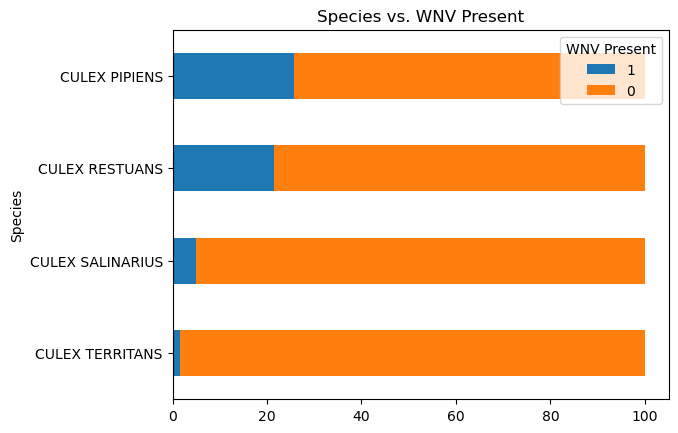

In [147]:
# Create a stacked horizontal bar plot between 'Mosquito ID (species)' vs. 'WNV prevalence'
# Find out which mosquito ID (species) are more likely to show up (or positive)

mosquito_present_data.unstack()[[1,0]].sort_values(1).plot(kind = 'barh', stacked = True)
plt.title('Species vs. WNV Present');

- The stacked horizontal bar plot between 'Species' and 'WNV Present' shows that the majority, over 20%, of the species that is present is <b>CULEX PIPIENS</b>.
- However, the rest of the species (Restuans, Salinarius, Territans) are present below 20%.

In [151]:
# Create a new dataset containing 'Species' and 'WNV Presetn' columns

new_mdf = mdf[['Species','WNV Present']].copy()

In [152]:
new_mdf

,Species,WNV Present
0,CULEX RESTUANS,0
1,CULEX RESTUANS,0
2,CULEX RESTUANS,0
3,CULEX RESTUANS,0
4,CULEX RESTUANS,0
...,...,...
18490,CULEX PIPIENS,1
18491,CULEX PIPIENS,1
18492,CULEX RESTUANS,1
18493,CULEX RESTUANS,1


In [154]:
# Create dummy variables for 'Species'

pd.get_dummies(new_mdf['Species'])

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,1,0,0,0
18491,1,0,0,0
18492,0,1,0,0
18493,0,1,0,0


In [161]:
# Lets get the correlation matrix and save to variable 'corr_mat'

new_mdf['Species']=new_mdf['Species'].astype('category').cat.codes
corr_mat = new_mdf.corr()

# Display corr_mat
corr_mat

,Species,WNV Present
Species,1.000000,-0.120989
WNV Present,-0.120989,1.000000


- This shows a negative correlation meaning that on increasing one column, the value of the other column will decrease.

In [244]:
# Lets get the correlation matrix and save to variable 'corr_mat'
test_mdf = mdf.copy();
test_mdf['Species']=test_mdf['Species'].astype('category').cat.codes
test_mdf['Trap type']=test_mdf['Trap type'].astype('category').cat.codes
corr_mat = test_mdf.corr()

# Display corr_mat
corr_mat

,Year,Week,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Month,ohare_airport,satellite_trap
Year,1.000000,-0.023283,0.260747,0.129326,0.153881,0.223648,0.093983,-0.094628,-0.100847,0.105230,0.096830
Week,-0.023283,1.000000,0.015147,-0.033900,0.174265,-0.189195,-0.002876,0.002967,0.948940,-0.018139,0.028597
Trap type,0.260747,0.015147,1.000000,0.025647,0.034630,0.085731,0.029287,0.005174,-0.016384,-0.027313,0.473028
Mosquito number,0.129326,-0.033900,0.025647,1.000000,0.408034,-0.116738,0.096820,-0.151421,-0.040426,0.141671,0.035023
WNV Present,0.153881,0.174265,0.034630,0.408034,1.000000,-0.120989,0.110175,-0.163967,0.161334,0.116918,0.012404
Species,0.223648,-0.189195,0.085731,-0.116738,-0.120989,1.000000,-0.001853,0.034103,-0.200706,-0.016644,0.034582
Lat,0.093983,-0.002876,0.029287,0.096820,0.110175,-0.001853,1.000000,-0.749416,-0.011544,0.381654,0.041139
Lon,-0.094628,0.002967,0.005174,-0.151421,-0.163967,0.034103,-0.749416,1.000000,0.010695,-0.621158,0.118775
Month,-0.100847,0.948940,-0.016384,-0.040426,0.161334,-0.200706,-0.011544,0.010695,1.000000,-0.025363,0.020660
ohare_airport,0.105230,-0.018139,-0.027313,0.141671,0.116918,-0.016644,0.381654,-0.621158,-0.025363,1.000000,-0.063898


- The above table represents the correlations between each column of the data frame. The correlation between itself is 1.0, The negative correlation defined negative relationship means on increasing one column the value of the second will decrease and vice-versa. 
- The zeros correlation defines no relationship i.e neutral, and positive correlations define positive relationships meaning on increasing one column the value of the second will also increase and vice-versa.

In [245]:
# View the dataset

test_mdf

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,ohare_airport,satellite_trap
0,2019,39,100XX W OHARE AIRPORT,T910,1,2019-09-26 00:09:00,2,0,1,41.977738,-87.880969,9,1,0
1,2019,39,52XX S KOLMAR AVE,T114,1,2019-09-26 00:09:00,1,0,1,41.798211,-87.736925,9,0,0
2,2019,39,58XX N WESTERN AVE,T028,1,2019-09-26 00:09:00,2,0,1,41.987245,-87.689417,9,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,1,2019-09-26 00:09:00,1,0,1,41.953664,-87.724987,9,0,0
4,2019,39,131XX S BRANDON AVE,T209,1,2019-09-26 00:09:00,9,0,1,41.657069,-87.546049,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,1,2016-09-09 00:09:00,4,1,0,41.857843,-87.635858,9,0,0
18491,2007,34,46XX N MILWAUKEE AVE,T003,1,2007-08-24 00:08:00,19,1,0,41.965376,-87.758403,8,0,0
18492,2016,30,127XX S DOTY AVE,T115,1,2016-07-27 00:07:00,34,1,1,41.662395,-87.590176,7,0,0
18493,2017,33,20XX N DOMINICK ST,T240B,3,2017-08-17 00:08:00,50,1,1,41.919197,-87.664758,8,0,1


Drop all non-numerical variables to prevent any issue they might cause in the tests.

In [246]:
test_mdf.drop('Address Block', axis=1, inplace=True)

In [248]:
test_mdf.drop('Date', axis=1, inplace=True)

In [255]:
test_mdf.drop('Trap', axis=1, inplace=True)

Create visuallizations

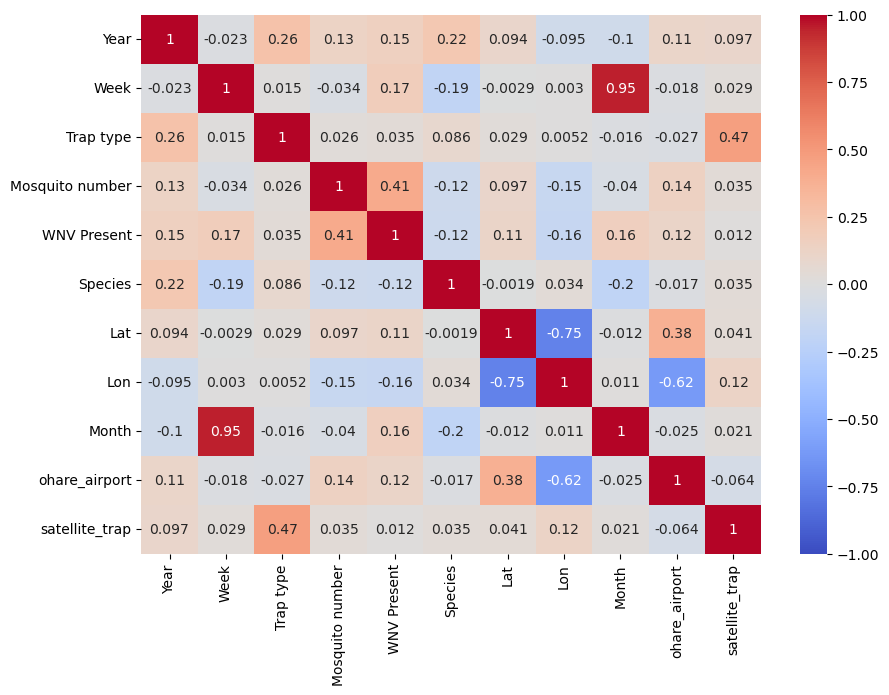

In [237]:
# Heatmap 2.0

plt.figure(figsize=(10,7))

sns.heatmap(corr_mat, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

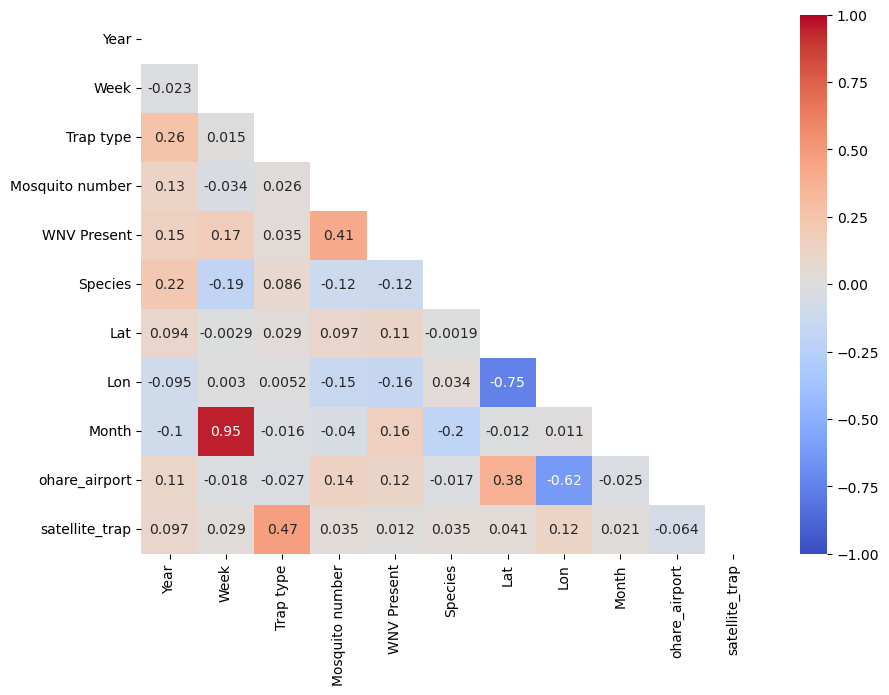

In [238]:
# Heatmap 3.0

plt.figure(figsize=(10,7))

# creating mask of duplicated combinations
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

- Based on the correlation matrix, it looks like `Species` is negatively correlated with `WNV Present`
- Also, `Mosquito number` appears to be positively correlated with `WNV Present`, `ohare_airport`, `satellite trap`, `Year`, and `Trap type`. However, `Mosquito number` also appears to be negatively correlated with `Species` `Month`, and `Week`.
- Conclusion: these correlations are statistically significant.
---

At this stage,the correlation coefficients with respect to `WNV Present` for significance will be tested. 
Null and alternative hypotheses: 

**$H_0$**: $corr(x,y)=0$ (The correlation between the two variables is 0) 

**$H_1$**: $corr(x,y)\ne0$ (The correlation between the two variables is not 0)

In [239]:
from scipy.stats import pearsonr

# Alpha is p-value
def pearson_df(dataframe, target, alpha=0.05):
    '''
    This function takes a dataframe with a column of interest (target), a significance threshold (alpha) as inputs. It then calculates the correlation coefficients
    and p-values using scipy.stats.pearsonr(), and returns a dataframe of the results
    
    Parameters:
    -----------
    dataframe: a pandas dataframe containing the data to compare
    target: a string specifying one of the columns in the dataframe to compare to the rest of the data
    alpha: a significance threshold for evaluating p-values (default 0.05)
    
    Returns:
    --------
    output: a dataframe containing correlation coefficients and p-values for each variable in dataframe w.r.t. the target variable
    
    '''
    
    # Validate the inputs
    assert isinstance(dataframe, pd.DataFrame), 'dataframe must be a pandas DataFrame'
    assert isinstance(target, str), 'target must be a string'
    assert isinstance(alpha, float), 'alpha must be a float'
    assert(0 <= alpha <= 1), 'alpha must be between 0 and 1'
    
    # Instantiating empty lists
    variable_names = []
    corr_list = []
    p_value_list = []
    
    # Looping across all of the columns in the dataframe
    for column in range(dataframe.shape[1]):
        
        # Calculating the coefficient and p-value for each column w.r.t. the target variable
        corr, p_value = pearsonr(dataframe.iloc[:, column], dataframe[target])
        
        # Add the column name, coefficient, and p-value to their respective lists
        variable_names.append(dataframe.columns[column])
        corr_list.append(corr)
        p_value_list.append(p_value)

    # Turn the three lists into a dataframe for easier viewing
    output = pd.DataFrame(index=variable_names, data={'coefficient': corr_list, 'p-value': p_value_list})
    
    # Add a column which states whether the correlation is significant
    output[f'p-value <= {alpha}'] = np.where(output['p-value'] <= alpha, True, False)
    
    # Drop the target variable from the dataframe
    output = output.drop(target)
    
    print(f'Correlations between data columns and {target}:')
    
    return output

In [240]:
# Pearson

correlation_df = pearson_df(new_mdf, 'WNV Present')
correlation_df

Correlations between data columns and WNV Present:


,coefficient,p-value,p-value <= 0.05
Species,-0.120989,2.929026e-61,True


In [172]:
mosquito_mdf = test_mdf[['Species','WNV Present', 'Mosquito number', 'Year', 'Week', 'Month', 'Trap type']].copy()
correlation_df = pearson_df(mosquito_mdf, 'Mosquito number')
correlation_df

Correlations between data columns and Mosquito number:


,coefficient,p-value,p-value <= 0.05
Species,-0.116738,3.964497e-57,True
WNV Present,0.408034,0.000000e+00,True
Year,0.129326,8.393050e-70,True
Week,-0.033900,4.002825e-06,True
Month,-0.040426,3.803876e-08,True
Trap type,0.025647,4.862966e-04,True


- The results above shows that the correlations for all these columns are significant.
- We can reject the null hypothesis which means that the correlation between the variabels is 0.

Visualize the strength of these correlations:

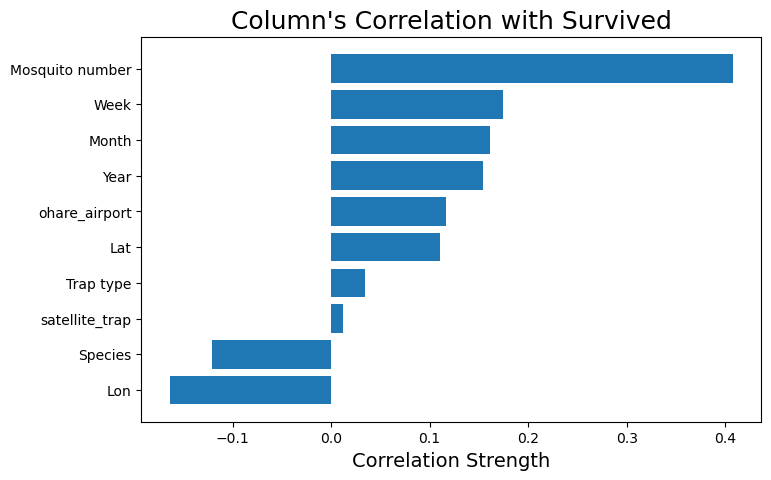

In [303]:
plt.figure(figsize=(8,5))
correlation_df.sort_values(by='coefficient', inplace=True)
plt.barh(correlation_df.index, correlation_df["coefficient"])
plt.title("Column's Correlation with Survived", fontsize=18)
plt.xlabel("Correlation Strength", fontsize=14)
plt.show()

### Advance Statistical Analysis

#### Run a linear regression to determine how the independent variables affect the number of mosquitoes caught

Linear regression is an approach used to model any linear relationship between variables.
Within this approach, we try to model a continuous dependent variable or response with independent variables also called predictors.
Before learning the details of linear regression, we will dive into how variables can be related. Then we will learn how we can describe that relationship using linear regression models.

In [174]:
mdf.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


#### Correlation and Covariance

When presented with continuous dependent and independent variables, the first step should always be to plot them out.

The goal here is to model 'Year' and 'Mosquito number'. So, the dependent variable is the number of mosquito caught and the independent variable is year.

In [175]:
X = mdf['Year'] # independent
y = mdf['Mosquito number'] # dependent

In [176]:
np.cov(X, y)

array([[ 13.88201174,   6.49296038],
       [  6.49296038, 181.57739201]])

In [177]:
print(np.corrcoef(X,y))

[[1.         0.12932595]
 [0.12932595 1.        ]]


In [178]:
corr = np.corrcoef(X,y)[0,1]

tval = corr * np.sqrt((len(X)-2)/(1- corr **2))
print(tval)

p = stats.t.sf(tval, len(X)-2)*2 #two tailed!
print(p)

stats.pearsonr(X,y)

17.73584532404185
8.393050016717503e-70


PearsonRResult(statistic=0.12932594549371043, pvalue=8.393050016377127e-70)

- The correlation between <b>Year</b> and <b>Mosquito number</b> for this sample is 0.12. When testing whether the population correlation for these variables is 0, based on this sample, we get a p-value of 8.393050016377127e-70. This is a lot less than the significance level of 0.05.
- Conclusion: We can reject the null hypothesis and say that, in the population, the relationship between year and mosquito number is statistically significant. The correlation between <b>Year</b> and <b>Mosquito number</b> is fairly weak. This can be approximated with the sample correlation of 0.12.

#### Multiple Linear Regression

In [ ]:
# Convert data type of 'Trap type'

test_mdf['Trap type'] = test_mdf['Trap type'].astype('category').cat.codes

In [198]:
X = mdf[['Year', 'Month', 'Week', 'Trap type', 'Species']]
y = mdf['Mosquito number']

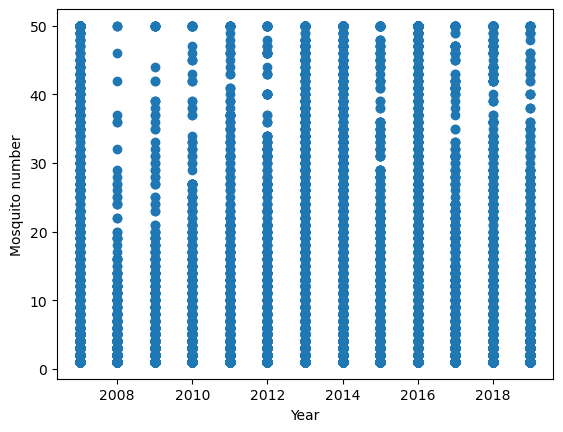

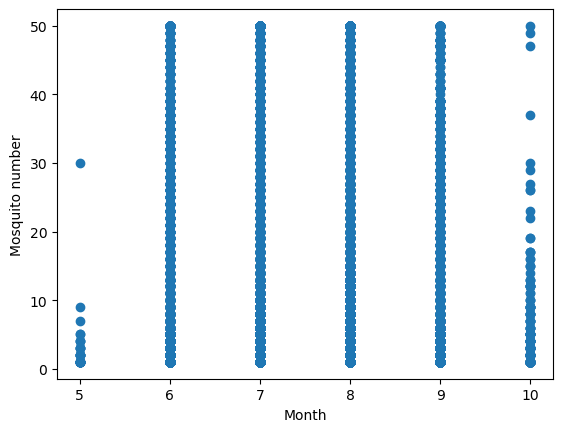

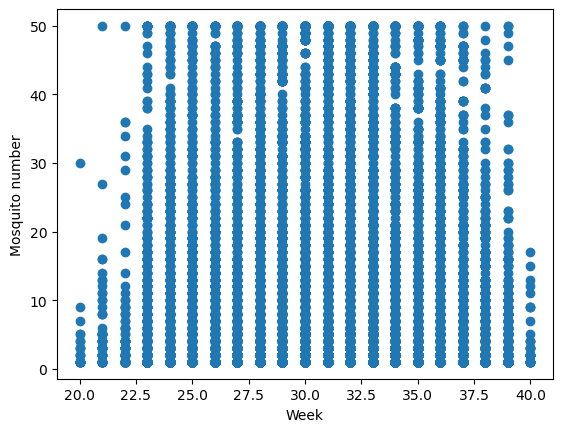

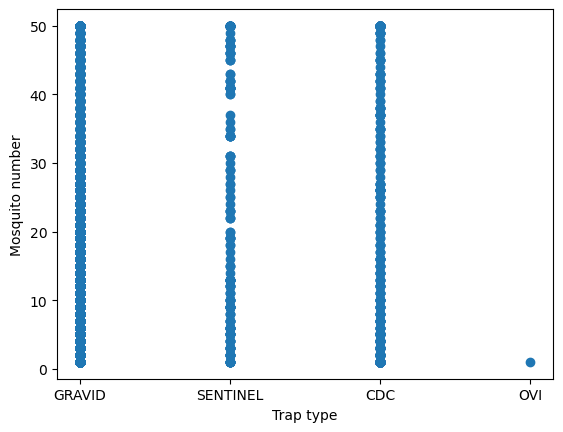

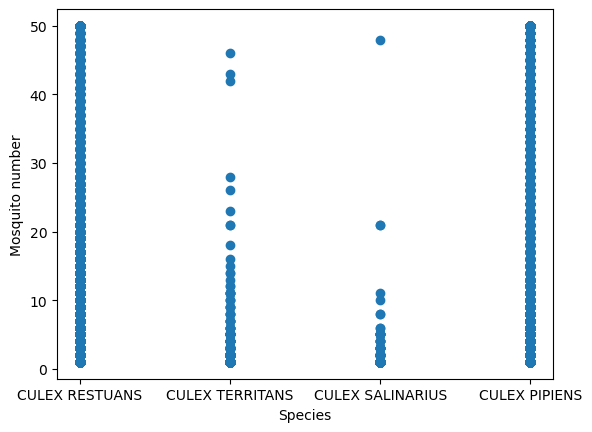

In [199]:
# Use a loop to create 6 plots 

for col in X.columns: 
    plt.figure()
    plt.scatter(X[col], y)
    plt.ylabel('Mosquito number')
    plt.xlabel(col)
    plt.show();

- Seems like there is no linear relationship present in all plots. However,we will continue and fit a linear model.

Switching to 'test_mdf' since it has numerical values for the interested columns

In [200]:
X = test_mdf[['Year', 'Month', 'Week', 'Trap type', 'Species']]
y = test_mdf['Mosquito number']

In [201]:
X_withconstant = sm.add_constant(X)

In [202]:
# 1. Instantiate model
lm_mosquito = sm.OLS(y,X_withconstant)

# 2. Fit model
lm_mosquito_results = lm_mosquito.fit()

lm_mosquito_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     165.0
Date:                Sun, 26 Mar 2023   Prob (F-statistic):          3.57e-172
Time:                        21:54:48   Log-Likelihood:                -73942.
No. Observations:               18495   AIC:                         1.479e+05
Df Residuals:                   18489   BIC:                         1.479e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1192.2025     56.922    -20.944      0.000   -1303.775   -1080.630
Year           0.6019      0.028     21.267      0.000       0.546       0.657
Month          0.1742      0.318      0.547      0.584      -0.450       0.798
Week          -0.2285      0.073     -3.128      0.002      -0.372      -0.085
Trap type     -0.1121      0.368     -0.304      0.761      -0.834       0.610
Species       -3.2347      0.147    -21.943      0.000      -3.524      -2.946
==============================================================================
Omnibus:                     4926.126   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10247.999
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                       4.723   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- According to the table above, the value of R^2 is very low.
- Moreover, both <b>Month</b> and <b>Trap type</b> have p-values above the 0.05 threshold. 
- Given a null hypothesis that independent variables individually do not impact WNV Present, we fail to reject for these two columns. 
- Further analysis can be carried out separately but they may be candidates for removal if we were developing our model further.

#### Run a logistic regression to determine how the independent variables affect West Nile Virus presence

In [206]:
# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = test_mdf.corr()

# Display corr_mat
corr_mat

,Year,Week,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Month
Year,1.000000,-0.023283,0.260747,0.129326,0.153881,0.223648,0.093983,-0.094628,-0.100847
Week,-0.023283,1.000000,0.015147,-0.033900,0.174265,-0.189195,-0.002876,0.002967,0.948940
Trap type,0.260747,0.015147,1.000000,0.025647,0.034630,0.085731,0.029287,0.005174,-0.016384
Mosquito number,0.129326,-0.033900,0.025647,1.000000,0.408034,-0.116738,0.096820,-0.151421,-0.040426
WNV Present,0.153881,0.174265,0.034630,0.408034,1.000000,-0.120989,0.110175,-0.163967,0.161334
Species,0.223648,-0.189195,0.085731,-0.116738,-0.120989,1.000000,-0.001853,0.034103,-0.200706
Lat,0.093983,-0.002876,0.029287,0.096820,0.110175,-0.001853,1.000000,-0.749416,-0.011544
Lon,-0.094628,0.002967,0.005174,-0.151421,-0.163967,0.034103,-0.749416,1.000000,0.010695
Month,-0.100847,0.948940,-0.016384,-0.040426,0.161334,-0.200706,-0.011544,0.010695,1.000000


- The above table represents the correlations between each column of the data frame. The correlation between itself is 1.0, The negative correlation defined negative relationship means on increasing one column the value of the second will decrease and vice-versa. 
- The zeros correlation defines no relationship i.e neutral, and positive correlations define positive relationships meaning on increasing one column the value of the second will also increase and vice-versa.

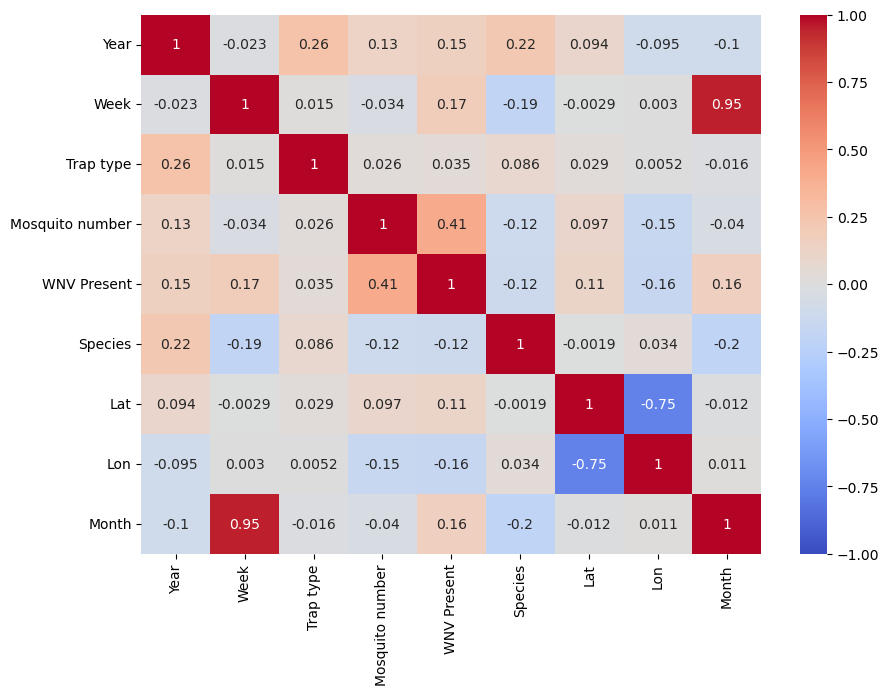

In [207]:
# Heatmap 2.0
plt.figure(figsize=(10,7))

sns.heatmap(corr_mat, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

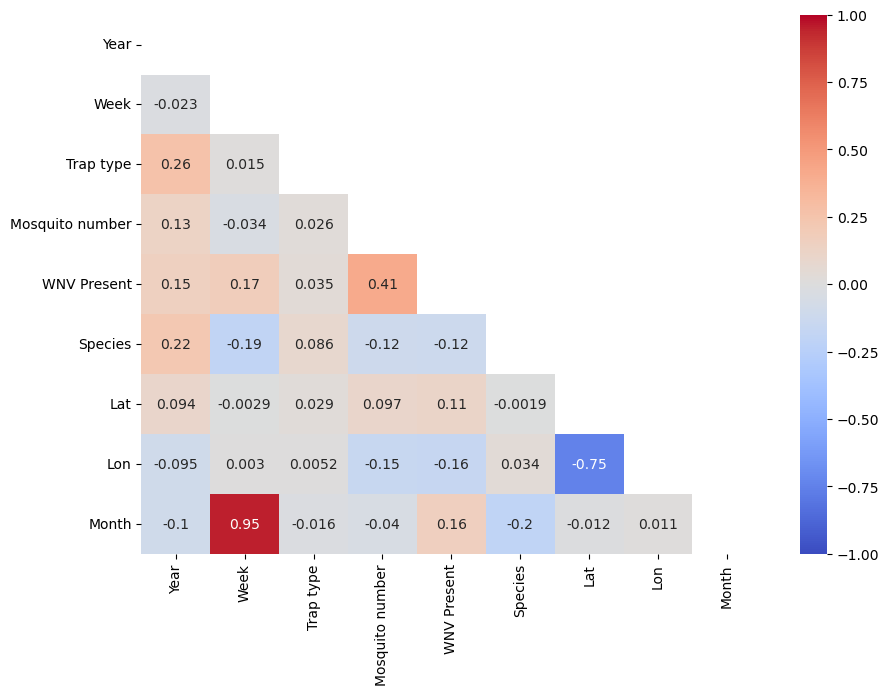

In [208]:
# Heatmap 3.0
plt.figure(figsize=(10,7))

# creating mask of duplicated combinations
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

- Based on the correlation matrix, it looks like `Species` is negatively correlated with `Week`, `Mosquito number`, and `WNV Present`. Moreover, `Species` is positively correlated with `Year` and `Trap type`.
- Also, `Mosquito number` appears to be positively correlated with `WNV Present`, `Year`, and `Trap type`. However, `Mosquito number` also appears to be negatively correlated with `Species` `Month`, and `Week`.
- Conclusion: these correlations are statistically significant.
---

At this stage,the correlation coefficients with respect to `WNV Present` for significance will be tested. 
Null and alternative hypotheses: 

**$H_0$**: $corr(x,y)=0$ (The correlation between the two variables is 0) 

**$H_1$**: $corr(x,y)\ne0$ (The correlation between the two variables is not 0)

In [209]:
from scipy.stats import pearsonr

# Alpha is p-value
def pearson_df(dataframe, target, alpha=0.05):
    '''
    This function takes a dataframe with a column of interest (target), a significance threshold (alpha) as inputs. It then calculates the correlation coefficients
    and p-values using scipy.stats.pearsonr(), and returns a dataframe of the results
    
    Parameters:
    -----------
    dataframe: a pandas dataframe containing the data to compare
    target: a string specifying one of the columns in the dataframe to compare to the rest of the data
    alpha: a significance threshold for evaluating p-values (default 0.05)
    
    Returns:
    --------
    output: a dataframe containing correlation coefficients and p-values for each variable in dataframe w.r.t. the target variable
    
    '''
    
    # Validate the inputs
    assert isinstance(dataframe, pd.DataFrame), 'dataframe must be a pandas DataFrame'
    assert isinstance(target, str), 'target must be a string'
    assert isinstance(alpha, float), 'alpha must be a float'
    assert(0 <= alpha <= 1), 'alpha must be between 0 and 1'
    
    # Instantiating empty lists
    variable_names = []
    corr_list = []
    p_value_list = []
    
    # Looping across all of the columns in the dataframe
    for column in range(dataframe.shape[1]):
        
        # Calculating the coefficient and p-value for each column w.r.t. the target variable
        corr, p_value = pearsonr(dataframe.iloc[:, column], dataframe[target])
        
        # Add the column name, coefficient, and p-value to their respective lists
        variable_names.append(dataframe.columns[column])
        corr_list.append(corr)
        p_value_list.append(p_value)

    # Turn the three lists into a dataframe for easier viewing
    output = pd.DataFrame(index=variable_names, data={'coefficient': corr_list, 'p-value': p_value_list})
    
    # Add a column which states whether the correlation is significant
    output[f'p-value <= {alpha}'] = np.where(output['p-value'] <= alpha, True, False)
    
    # Drop the target variable from the dataframe
    output = output.drop(target)
    
    print(f'Correlations between data columns and {target}:')
    
    return output

In [ ]:
mdf['WNV Present'] = np.where(mdf['WNV Present'] == 'positive', 1, 0)

In [212]:
mdf['WNV Present']

0        0
1        0
2        0
3        0
4        0
        ..
18490    1
18491    1
18492    1
18493    1
18494    1
Name: WNV Present, Length: 18495, dtype: int64

In [256]:
test_mdf

,Year,Week,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Month,ohare_airport,satellite_trap
0,2019,39,1,2,0,1,41.977738,-87.880969,9,1,0
1,2019,39,1,1,0,1,41.798211,-87.736925,9,0,0
2,2019,39,1,2,0,1,41.987245,-87.689417,9,0,0
3,2019,39,1,1,0,1,41.953664,-87.724987,9,0,0
4,2019,39,1,9,0,1,41.657069,-87.546049,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,1,4,1,0,41.857843,-87.635858,9,0,0
18491,2007,34,1,19,1,0,41.965376,-87.758403,8,0,0
18492,2016,30,1,34,1,1,41.662395,-87.590176,7,0,0
18493,2017,33,3,50,1,1,41.919197,-87.664758,8,0,1


In [257]:
correlation_df = pearson_df(test_mdf, 'WNV Present')
correlation_df

Correlations between data columns and WNV Present:


,coefficient,p-value,p-value <= 0.05
Year,0.153881,2.220840e-98,True
Week,0.174265,4.858884e-126,True
Trap type,0.034630,2.468959e-06,True
Mosquito number,0.408034,0.000000e+00,True
Species,-0.120989,2.929026e-61,True
Lat,0.110175,4.799703e-51,True
Lon,-0.163967,1.296078e-111,True
Month,0.161334,4.494336e-108,True
ohare_airport,0.116918,2.666992e-57,True
satellite_trap,0.012404,9.162806e-02,False


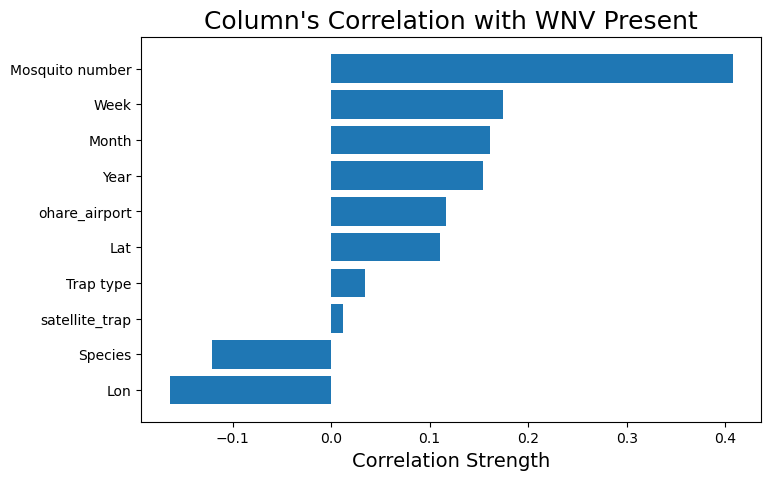

In [258]:
plt.figure(figsize=(8,5))
correlation_df.sort_values(by='coefficient', inplace=True)
plt.barh(correlation_df.index, correlation_df["coefficient"])
plt.title("Column's Correlation with WNV Present", fontsize=18)
plt.xlabel("Correlation Strength", fontsize=14)
plt.show()

#### Building a logistic regression model

In [215]:
# Importing statsmodel.api

import statsmodels.api as sm

In [260]:
# Saving the independent variables to 'X'
X_0 = test_mdf.drop('WNV Present', axis=1)

# Saving dependent variable to 'y'
y = test_mdf['WNV Present']

# Check 
display(X_0)
print(y)

,Year,Week,Trap type,Mosquito number,Species,Lat,Lon,Month,ohare_airport,satellite_trap
0,2019,39,1,2,1,41.977738,-87.880969,9,1,0
1,2019,39,1,1,1,41.798211,-87.736925,9,0,0
2,2019,39,1,2,1,41.987245,-87.689417,9,0,0
3,2019,39,1,1,1,41.953664,-87.724987,9,0,0
4,2019,39,1,9,1,41.657069,-87.546049,9,0,0
...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,1,4,0,41.857843,-87.635858,9,0,0
18491,2007,34,1,19,0,41.965376,-87.758403,8,0,0
18492,2016,30,1,34,1,41.662395,-87.590176,7,0,0
18493,2017,33,3,50,1,41.919197,-87.664758,8,0,1


0        0
1        0
2        0
3        0
4        0
        ..
18490    1
18491    1
18492    1
18493    1
18494    1
Name: WNV Present, Length: 18495, dtype: int64


In [261]:
# !! Add constant to our X !!
X_const_0 = sm.add_constant(X_0)

# Check it out 
X_const_0

,const,Year,Week,Trap type,Mosquito number,Species,Lat,Lon,Month,ohare_airport,satellite_trap
0,1.0,2019,39,1,2,1,41.977738,-87.880969,9,1,0
1,1.0,2019,39,1,1,1,41.798211,-87.736925,9,0,0
2,1.0,2019,39,1,2,1,41.987245,-87.689417,9,0,0
3,1.0,2019,39,1,1,1,41.953664,-87.724987,9,0,0
4,1.0,2019,39,1,9,1,41.657069,-87.546049,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18490,1.0,2016,36,1,4,0,41.857843,-87.635858,9,0,0
18491,1.0,2007,34,1,19,0,41.965376,-87.758403,8,0,0
18492,1.0,2016,30,1,34,1,41.662395,-87.590176,7,0,0
18493,1.0,2017,33,3,50,1,41.919197,-87.664758,8,0,1


Fit the model to the data:

In [262]:
# Instantiate the logistic regression model 
logreg_0 = sm.Logit(y, X_const_0)

# Fit the model (this returns a separate object with the parameters)
logreg_results_0 = logreg_0.fit()

# Display the results 
logreg_results_0.summary()

Optimization terminated successfully.
         Current function value: 0.406717
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18484
Method:                           MLE   Df Model:                           10
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                  0.2205
Time:                        23:40:21   Log-Likelihood:                -7522.2
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -598.9651     31.995    -18.721      0.000    -661.674    -536.256
Year                0.1268      0.007     19.056      0.000       0.114       0.140
Week                0.0929      0.016      5.812      0.000       0.062       0.124
Trap type          -0.0709      0.087     -0.816      0.415      -0.241       0.099
Mosquito number     0.0652      0.001     45.834      0.000       0.062       0.068
Species            -0.4520      0.040    -11.302      0.000      -0.530      -0.374
Lat                -0.7417      0.296     -2.505      0.012      -1.322      -0.161
Lon                -4.1993      0.418    -10.042      0.000      -5.019      -3.380
Month               0.2128      0.069      3.088      0.002       0.078       0.348
ohare_airport      -0.2001      0.078     -2.579      0.010      -0.352      -0.048
satellite_trap     -0.0203      0.151     -0.134      0.893      -0.317       0.276
===================================================================================
"""

- Notice that both <b>Trap type</b> and <b>satelellite_trap</b> have p-values above the 0.05 threshold. 
- Given a null hypothesis that independent variables individually do not impact WNV Present, we fail to reject for these two columns. 
- Further analysis can be carried out separately but they may be candidates for removal if we were developing our model further.

#### Evaluation

- We will evaluate how well our model performed by looking at the accuracy of its predictions. 

- We will need to get the model's predictions of the WNV present and then compare that to the known WNV present stored in `y`. 

In [263]:
# Getting the model predictions as probabilities and saving to 'y_proba'

y_proba_0 = logreg_results_0.predict(X_const_0)

y_proba_0

0        0.472920
1        0.390485
2        0.327439
3        0.351901
4        0.349619
           ...   
18490    0.283823
18491    0.258667
18492    0.388804
18493    0.763048
18494    0.245024
Length: 18495, dtype: float64

In [264]:
# Going from soft predictions (probabilities) to hard predictions (1 or 0)
# We will set our threshold to 0.5 

y_pred_0 = np.where(y_proba_0 >= 0.5, 1, 0)

y_pred_0

array([0, 0, 0, ..., 0, 1, 0])

Determine the accuracy of the model's performance

In [265]:
# Calculating accuracy - Evaluate the two arrays to find where predicted = true survival
# Then divide by the number of predictions/passengers
acc_0 = (y_pred_0 == y).mean()

# Print the accuracy score
print(f'Model accuracy = {acc_0}')

Model accuracy = 0.8120573127872398


- The model has an accuracy score of 81.20% which is not bad given for using 10 variables and this was the first model specification we fit.

In [266]:
accuracy_list = []
threshold_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in threshold_list:
    y_pred_0 = np.where(y_proba_0 >= threshold, 1, 0)

    # Calculating accuracy 
    acc = 100*(y_pred_0 == y).mean()

    # Add the accuracy to our dictionary
    accuracy_list.append(acc)

accuracy_df_0 = pd.DataFrame(index=range(len(threshold_list)), 
                           data=zip(threshold_list, accuracy_list), 
                           columns=['Decision Threshold', 'Accuracy'])

accuracy_df_0

,Decision Threshold,Accuracy
0,0.1,56.636929
1,0.2,72.868343
2,0.3,78.680725
3,0.4,80.578535
4,0.5,81.205731
5,0.6,81.189511
6,0.7,80.335226
7,0.8,79.297107
8,0.9,78.399567


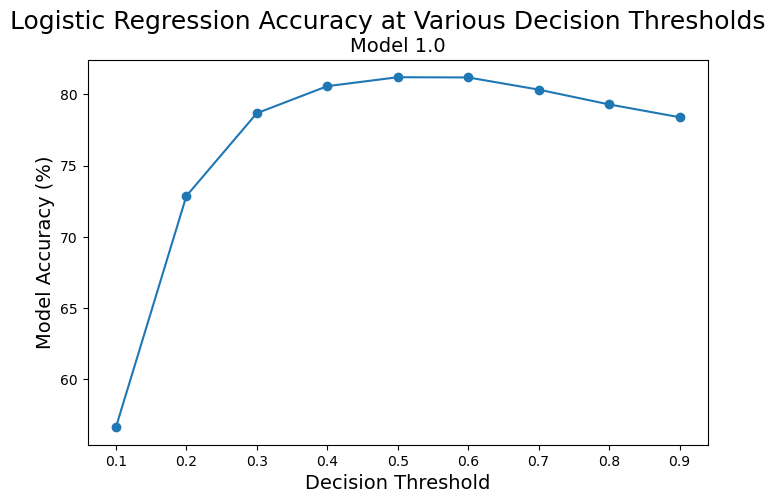

In [267]:
plt.figure(figsize=(8,5))
plt.plot(accuracy_df_0['Decision Threshold'], accuracy_df_0['Accuracy'], marker='o')
plt.suptitle('Logistic Regression Accuracy at Various Decision Thresholds', size=18)
plt.title('Model 1.0', size=14)
plt.xlabel('Decision Threshold', size=14)
plt.ylabel('Model Accuracy (%)', size=14)
plt.yticks()
plt.show()

- According to the result above, the highest accuracy is still obtained where the decision threshold is 0.6. This may be a result of the class imbalance in WNV Present that we saw earlier.

#### Interpreting coefficents

Interpret some of the coefficients and determine how the different factors impact the odds of WNV Present

In [268]:
# Getting the regression coefficients from the params attribute of the fitted model object

logreg_results_0.params

const             -598.965130
Year                 0.126799
Week                 0.092944
Trap type           -0.070933
Mosquito number      0.065177
Species             -0.452028
Lat                 -0.741658
Lon                 -4.199264
Month                0.212754
ohare_airport       -0.200061
satellite_trap      -0.020278
dtype: float64

In [269]:
# Lets put this in a dataframe
results_df_0 = pd.DataFrame(logreg_results_0.params, columns=['Coefficient'])

# Display the dataframe
results_df_0

,Coefficient
const,-598.965130
Year,0.126799
Week,0.092944
Trap type,-0.070933
Mosquito number,0.065177
Species,-0.452028
Lat,-0.741658
Lon,-4.199264
Month,0.212754
ohare_airport,-0.200061


In [270]:
# Calculate and add the odds ratios to results_df_0
# Log odds is more interpretable
results_df_0['odds_ratio'] = np.exp(results_df_0['Coefficient'])

# Display the dataframe
results_df_0

,Coefficient,odds_ratio
const,-598.965130,7.460180e-261
Year,0.126799,1.135189e+00
Week,0.092944,1.097400e+00
Trap type,-0.070933,9.315247e-01
Mosquito number,0.065177,1.067348e+00
Species,-0.452028,6.363361e-01
Lat,-0.741658,4.763237e-01
Lon,-4.199264,1.500662e-02
Month,0.212754,1.237081e+00
ohare_airport,-0.200061,8.186809e-01


- It looks like the the factor that had the greatest (positive) impact on WVN Present was whether or not they were in certain months.
- Being in the months that the test being performed meant that the mosquitoes had 1.24 times better odds to be present.

#### Model 1.1

The next step is to iteratively improve our model. We can do this by removing independent variables and see how that affects the model results (model.summary()) and performance (accuracy).

We could start with the independent variables which had a p-value > 0.05 for their regression coefficient. As a next step, try removing these and then evaluating the model.

In [271]:
logreg_results_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18484
Method:                           MLE   Df Model:                           10
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2205
Time:                        00:17:31   Log-Likelihood:                -7522.2
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -598.9651     31.995    -18.721      0.000    -661.674    -536.256
Year                0.1268      0.007     19.056      0.000       0.114       0.140
Week                0.0929      0.016      5.812      0.000       0.062       0.124
Trap type          -0.0709      0.087     -0.816      0.415      -0.241       0.099
Mosquito number     0.0652      0.001     45.834      0.000       0.062       0.068
Species            -0.4520      0.040    -11.302      0.000      -0.530      -0.374
Lat                -0.7417      0.296     -2.505      0.012      -1.322      -0.161
Lon                -4.1993      0.418    -10.042      0.000      -5.019      -3.380
Month               0.2128      0.069      3.088      0.002       0.078       0.348
ohare_airport      -0.2001      0.078     -2.579      0.010      -0.352      -0.048
satellite_trap     -0.0203      0.151     -0.134      0.893      -0.317       0.276
===================================================================================
"""

'Trap type' and 'satellite_trap' will be dropped since their p-value is greater than 0.05.

In [274]:
# Drop 'Trap type' from X_const_1
X_const_1 = X_const_0.drop(['Trap type'], axis=1)

# Check 
display(X_const_1)

,const,Year,Week,Mosquito number,Species,Lat,Lon,Month,ohare_airport,satellite_trap
0,1.0,2019,39,2,1,41.977738,-87.880969,9,1,0
1,1.0,2019,39,1,1,41.798211,-87.736925,9,0,0
2,1.0,2019,39,2,1,41.987245,-87.689417,9,0,0
3,1.0,2019,39,1,1,41.953664,-87.724987,9,0,0
4,1.0,2019,39,9,1,41.657069,-87.546049,9,0,0
...,...,...,...,...,...,...,...,...,...,...
18490,1.0,2016,36,4,0,41.857843,-87.635858,9,0,0
18491,1.0,2007,34,19,0,41.965376,-87.758403,8,0,0
18492,1.0,2016,30,34,1,41.662395,-87.590176,7,0,0
18493,1.0,2017,33,50,1,41.919197,-87.664758,8,0,1


In [275]:
# Redo the process

# Instantiate the logistic regression model 
logreg_1 = sm.Logit(y, X_const_1)

# Fit the model (this returns a separate object with the parameters)
logreg_results_1 = logreg_1.fit()

# Display the results 
logreg_results_1.summary()

Optimization terminated successfully.
         Current function value: 0.406734
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18485
Method:                           MLE   Df Model:                            9
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2204
Time:                        00:31:30   Log-Likelihood:                -7522.6
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -593.6765     31.311    -18.961      0.000    -655.045    -532.308
Year                0.1255      0.006     19.427      0.000       0.113       0.138
Week                0.0924      0.016      5.783      0.000       0.061       0.124
Mosquito number     0.0652      0.001     45.892      0.000       0.062       0.068
Species            -0.4530      0.040    -11.329      0.000      -0.531      -0.375
Lat                -0.7267      0.295     -2.459      0.014      -1.306      -0.148
Lon                -4.1606      0.415    -10.016      0.000      -4.975      -3.346
Month               0.2151      0.069      3.124      0.002       0.080       0.350
ohare_airport      -0.1950      0.077     -2.522      0.012      -0.347      -0.043
satellite_trap     -0.0939      0.123     -0.764      0.445      -0.335       0.147
===================================================================================
"""

- All the p-values are under 0.05 except for <b>satellite_trap</b>. Let's see the accuracy from this model.

#### Evaluation

In [276]:
# Getting the model predictions as probabilities and saving to 'y_proba_1'

y_proba_1 = logreg_results_1.predict(X_const_1)

In [277]:
# Going from soft predictions (probabilities) to hard predictions (1 or 0)
y_pred_1 = np.where(y_proba_1 >= 0.5, 1, 0)

# Calculating accuracy 
acc_1 = (y_pred_1 == y).mean()

# Print the accuracy score
print(f'Model accuracy = {round(100*acc_1, 2)}%')

Model accuracy = 81.19%


- The model accuracy with a 0.5 decision threshold has decreased from 81.20% to 81.19%, but this is a very insignificant change.

See how changing the decision threshold affects the accuracy of our predictions:

In [278]:
accuracy_list = []
threshold_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in threshold_list:
    y_pred_1 = np.where(y_proba_1 >= threshold, 1, 0)

    # Calculating accuracy 
    acc_1 = 100*(y_pred_1 == y).mean()

    # Add the accuracy to our dictionary
    accuracy_list.append(acc_1)

accuracy_df_1 = pd.DataFrame(index=range(len(threshold_list)), 
                           data=zip(threshold_list, accuracy_list), 
                           columns=['Decision Threshold', 'Accuracy'])

accuracy_df_1

,Decision Threshold,Accuracy
0,0.1,56.582860
1,0.2,72.889970
2,0.3,78.696945
3,0.4,80.546094
4,0.5,81.194918
5,0.6,81.232766
6,0.7,80.319005
7,0.8,79.297107
8,0.9,78.399567


In [279]:
list(zip(threshold_list, accuracy_list))

[(0.1, 56.58286023249527),
 (0.2, 72.88997026223304),
 (0.3, 78.69694512030279),
 (0.4, 80.54609353879427),
 (0.5, 81.19491754528251),
 (0.6, 81.23276561232765),
 (0.7, 80.31900513652339),
 (0.8, 79.2971073263044),
 (0.9, 78.39956745066235)]

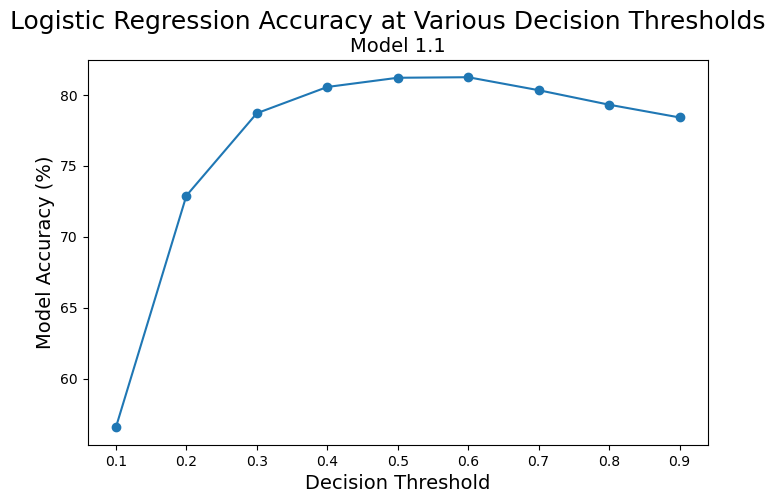

In [280]:
#plotting accuracy with different thresholds
plt.figure(figsize=(8,5))
plt.plot(accuracy_df_1['Decision Threshold'], accuracy_df_1['Accuracy'], marker='o')
plt.suptitle('Logistic Regression Accuracy at Various Decision Thresholds', size=18)
plt.title('Model 1.1', size=14)
plt.xlabel('Decision Threshold', size=14)
plt.ylabel('Model Accuracy (%)', size=14)
plt.yticks()
plt.show()

| Model 	| Accuracy 	| Decision Threshold 	| Accuracy 	| Decision Threshold 	|
|-------	|----------	|--------------------	|----------	|--------------------	|
| 1.0   	| 81.20%   	| 0.5                	| 81.17%   	| 0.6                	|
| 1.1   	| 81.19%   	| 0.5                	| 81.19%   	| 0.6   

- Despite the fact that the model is slightly less accurate than before at a decision threshold of 0.5, the accuracy is slightly increase at a higher decision threshold.

#### Interpreting coefficents

Let's interpret some of the coefficients and determine how the different factors impact the odds of WNV Present

In [282]:
# Getting the regression coefficients from the params attribute of the fitted model object

logreg_results_1.params

const             -593.676466
Year                 0.125512
Week                 0.092413
Mosquito number      0.065226
Species             -0.452980
Lat                 -0.726703
Lon                 -4.160591
Month                0.215090
ohare_airport       -0.195009
satellite_trap      -0.093940
dtype: float64

In [283]:
# Lets put this in a dataframe
results_df_1 = pd.DataFrame(logreg_results_1.params, columns=['Coefficient'])

# Display the dataframe
results_df_1

,Coefficient
const,-593.676466
Year,0.125512
Week,0.092413
Mosquito number,0.065226
Species,-0.452980
Lat,-0.726703
Lon,-4.160591
Month,0.215090
ohare_airport,-0.195009
satellite_trap,-0.093940


In [284]:
# Calculate and add the odds ratios to results_df_1
# Log odds is more interpretable
results_df_1['odds_ratio'] = np.exp(results_df_1['Coefficient'])

# Display the dataframe
results_df_1

,Coefficient,odds_ratio
const,-593.676466,1.477702e-258
Year,0.125512,1.133728e+00
Week,0.092413,1.096818e+00
Mosquito number,0.065226,1.067400e+00
Species,-0.452980,6.357308e-01
Lat,-0.726703,4.835003e-01
Lon,-4.160591,1.559833e-02
Month,0.215090,1.239974e+00
ohare_airport,-0.195009,8.228269e-01
satellite_trap,-0.093940,9.103376e-01


- It looks like the the factor that had the greatest (positive) impact on WVN Present was whether or not they were in certain years, months, and weeks, and maybe at a certain amount of mosquitoes.
- Being in the years that the test being performed meant that the mosquitoes had 1.13 times better odds to be present.
- Being in the months that the test being performed meant that the mosquitoes had 1.24 times better odds to be present.
- Being in the weeks that the test being performed meant that the mosquitoes had 1.10 times better odds to be present.
- Being in the amount of mosquitoes that the test being performed meant that the mosquitoes had 1.01 times better odds to be present.

#### Model 1.2

Let's continue the process by removing the 'satellite_trap' column:

In [286]:
# Recall our p-values from the last model

logreg_results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18485
Method:                           MLE   Df Model:                            9
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2204
Time:                        00:47:44   Log-Likelihood:                -7522.6
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -593.6765     31.311    -18.961      0.000    -655.045    -532.308
Year                0.1255      0.006     19.427      0.000       0.113       0.138
Week                0.0924      0.016      5.783      0.000       0.061       0.124
Mosquito number     0.0652      0.001     45.892      0.000       0.062       0.068
Species            -0.4530      0.040    -11.329      0.000      -0.531      -0.375
Lat                -0.7267      0.295     -2.459      0.014      -1.306      -0.148
Lon                -4.1606      0.415    -10.016      0.000      -4.975      -3.346
Month               0.2151      0.069      3.124      0.002       0.080       0.350
ohare_airport      -0.1950      0.077     -2.522      0.012      -0.347      -0.043
satellite_trap     -0.0939      0.123     -0.764      0.445      -0.335       0.147
===================================================================================
"""

In [287]:
# Drop 'satellite_trap' column
X_const_2 = X_const_1.drop(['satellite_trap'], axis=1)

# Check 
display(X_const_2)

,const,Year,Week,Mosquito number,Species,Lat,Lon,Month,ohare_airport
0,1.0,2019,39,2,1,41.977738,-87.880969,9,1
1,1.0,2019,39,1,1,41.798211,-87.736925,9,0
2,1.0,2019,39,2,1,41.987245,-87.689417,9,0
3,1.0,2019,39,1,1,41.953664,-87.724987,9,0
4,1.0,2019,39,9,1,41.657069,-87.546049,9,0
...,...,...,...,...,...,...,...,...,...
18490,1.0,2016,36,4,0,41.857843,-87.635858,9,0
18491,1.0,2007,34,19,0,41.965376,-87.758403,8,0
18492,1.0,2016,30,34,1,41.662395,-87.590176,7,0
18493,1.0,2017,33,50,1,41.919197,-87.664758,8,0


In [288]:
# Redo the process

# Instantiate the logistic regression model 
logreg_2 = sm.Logit(y, X_const_2)

# Fit the model (this returns a separate object with the parameters)
logreg_results_2 = logreg_2.fit()

# Display the results 
logreg_results_2.summary()

Optimization terminated successfully.
         Current function value: 0.406750
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18486
Method:                           MLE   Df Model:                            8
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.2204
Time:                        00:48:59   Log-Likelihood:                -7522.8
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -596.9185     31.026    -19.240      0.000    -657.728    -536.109
Year                0.1250      0.006     19.452      0.000       0.112       0.138
Week                0.0923      0.016      5.778      0.000       0.061       0.124
Mosquito number     0.0652      0.001     45.940      0.000       0.062       0.068
Species            -0.4537      0.040    -11.345      0.000      -0.532      -0.375
Lat                -0.7661      0.291     -2.634      0.008      -1.336      -0.196
Lon                -4.2280      0.406    -10.417      0.000      -5.024      -3.433
Month               0.2144      0.069      3.115      0.002       0.079       0.349
ohare_airport      -0.1977      0.077     -2.560      0.010      -0.349      -0.046
===================================================================================
"""

- At this point, all of the p-values are less than 0.05.

#### Evaluation

In [289]:
# Getting the model predictions as probabilities and saving to 'y_proba_2'

y_proba_2 = logreg_results_2.predict(X_const_2)

In [290]:
# Going from soft predictions (probabilities) to hard predictions (1 or 0)
y_pred_2 = np.where(y_proba_2 >= 0.5, 1, 0)

# Calculating accuracy 
acc_2 = (y_pred_2 == y).mean()

# Print the accuracy score
print(f'Model accuracy = {round(100*acc_2, 2)}%')

Model accuracy = 81.19%


- Our model accuracy with a 50% decision threshold is still 81.19%. This means the 'satellite_trap' column is statistically insignificant and it did not have any impact on our model's accuracy.

See how changing the decision threshold affects the accuracy of our predictions:

In [292]:
accuracy_list = []
threshold_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in threshold_list:
    y_pred_2 = np.where(y_proba_2 >= threshold, 1, 0)

    # Calculating accuracy 
    acc_2 = 100*(y_pred_2 == y).mean()

    # Add the accuracy to our dictionary
    accuracy_list.append(acc_2)

accuracy_df_2 = pd.DataFrame(index=range(len(threshold_list)), 
                           data=zip(threshold_list, accuracy_list), 
                           columns=['Decision Threshold', 'Accuracy'])

accuracy_df_2

,Decision Threshold,Accuracy
0,0.1,56.561233
1,0.2,72.868343
2,0.3,78.669911
3,0.4,80.573128
4,0.5,81.194918
5,0.6,81.157069
6,0.7,80.346039
7,0.8,79.270073
8,0.9,78.394161


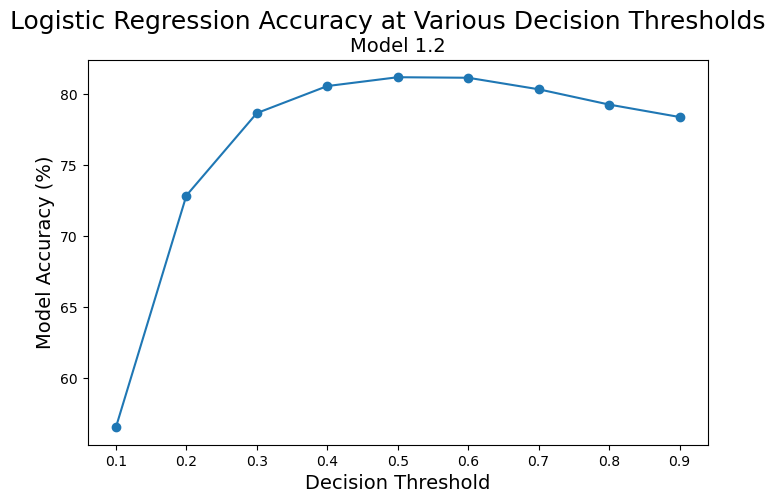

In [293]:
plt.figure(figsize=(8,5))
plt.plot(accuracy_df_2['Decision Threshold'], accuracy_df_2['Accuracy'], marker='o')
plt.suptitle('Logistic Regression Accuracy at Various Decision Thresholds', size=18)
plt.title('Model 1.2', size=14)
plt.xlabel('Decision Threshold', size=14)
plt.ylabel('Model Accuracy (%)', size=14)
plt.yticks()
plt.show()

| Model 	| Accuracy 	| Decision Threshold 	| Accuracy 	| Decision Threshold 	|
|-------	|----------	|--------------------	|----------	|--------------------	|
| 1.0   	| 81.20%   	| 0.5                	| 81.17%   	| 0.6                	|
| 1.1   	| 81.19%   	| 0.5                	| 81.19%   	| 0.6                   |
| 1.2   	| 81.19%    | 0.5                	| 81.16%   	| 0.6                	|

- At a decision threshold of 0.6, our model accuracy has slightly changed despite removing 2 of the 10 original columns which further illustrates that they might be insignificantly relevant to the model predictions.

#### Interpreting coefficents

Interpret some of the coefficients and determine how the different factors impact the odds of WNV Present

In [294]:
# Getting the regression coefficients from the params attribute of the fitted model object

logreg_results_2.params

const             -596.918459
Year                 0.125007
Week                 0.092337
Mosquito number      0.065155
Species             -0.453652
Lat                 -0.766126
Lon                 -4.228014
Month                0.214405
ohare_airport       -0.197727
dtype: float64

In [295]:
# Lets put this in a dataframe
results_df_2 = pd.DataFrame(logreg_results_2.params, columns=['Coefficient'])

# Display the dataframe
results_df_2

,Coefficient
const,-596.918459
Year,0.125007
Week,0.092337
Mosquito number,0.065155
Species,-0.453652
Lat,-0.766126
Lon,-4.228014
Month,0.214405
ohare_airport,-0.197727


In [296]:
# Calculate and add the odds ratios to results_df_2
# Log odds is more interpretable
results_df_2['odds_ratio'] = np.exp(results_df_2['Coefficient'])

# Display the dataframe
results_df_2

,Coefficient,odds_ratio
const,-596.918459,5.775734e-260
Year,0.125007,1.133157e+00
Week,0.092337,1.096734e+00
Mosquito number,0.065155,1.067325e+00
Species,-0.453652,6.353037e-01
Lat,-0.766126,4.648103e-01
Lon,-4.228014,1.458132e-02
Month,0.214405,1.239124e+00
ohare_airport,-0.197727,8.205942e-01


- It looks like the the factor that had the greatest (positive) impact on WVN Present was whether or not they were in certain years, months, and weeks, and maybe at a certain amount of mosquitoes.
- Being in the years that the test being performed meant that the mosquitoes had 1.13 times better odds to be present.
- Being in the months that the test being performed meant that the mosquitoes had 1.24 times better odds to be present.
- Being in the weeks that the test being performed meant that the mosquitoes had 1.10 times better odds to be present.
- Being in the amount of mosquitoes that the test being performed meant that the mosquitoes had 1.01 times better odds to be present.

### Saving the data

After spending time cleaning and exploring this dataset, the cleaned dataset should be saved:

In [ ]:
mdf.to_csv('clean_mosquito_data_part_2.csv', index = False)